In [7]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from statsmodels.graphics import tsaplots
import calendar

plt.figure(figsize=(20,12))
sns.set(rc={'figure.figsize':(20,10)})

ORG_NAME = "Organic"
CONV_NAME = "Conventional"

data = pd.read_csv('avocado.csv')

data['Date']= pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)

season_dict = {'1':'Winter',
               '2':'Spring', 
               '3':'Spring', 
               '4':'Spring', 
               '5':'Summer', 
               '6':'Summer', 
               '7':'Summer', 
               '8':'Autumn', 
               '9':'Autumn', 
               '10':'Autumn', 
               '11':'Winter', 
               '12':'Winter'}


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [3]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
conv = data[data.type == 'conventional']
org = data[data.type == 'organic']

## Price distribution per type

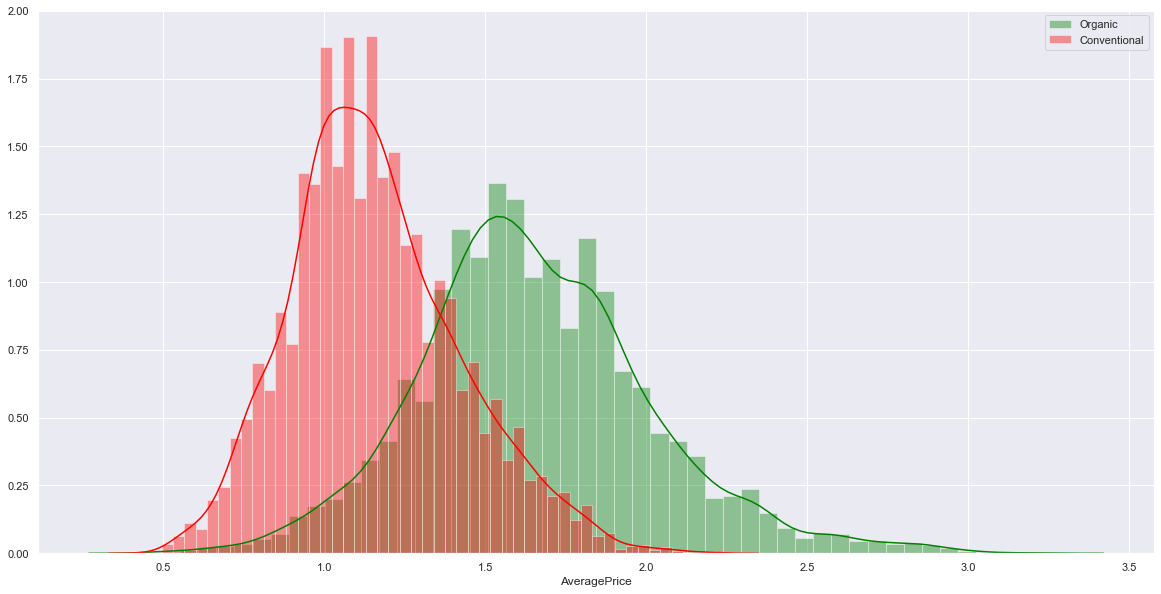

In [5]:
ax = sns.distplot(org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.distplot(conv.AveragePrice, label=CONV_NAME, color='red')
ax.legend()

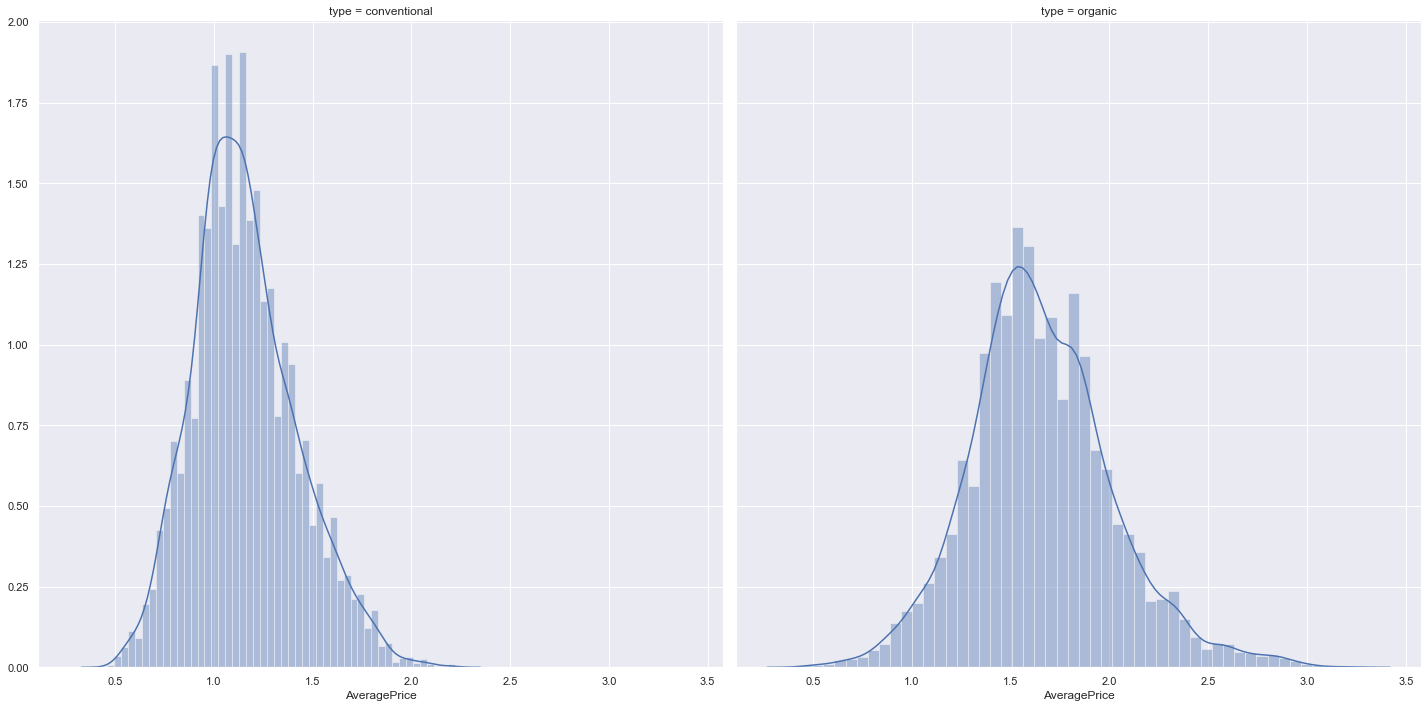

In [6]:
g = sns.FacetGrid(data, col="type", size=10)
g.map(sns.distplot, "AveragePrice")

## Price variation through time

Let's visualize the price variation through time by type of Avocado. First I make a single plot then I use the FactGrid function of sns to split the plot on 2 sub-plots.

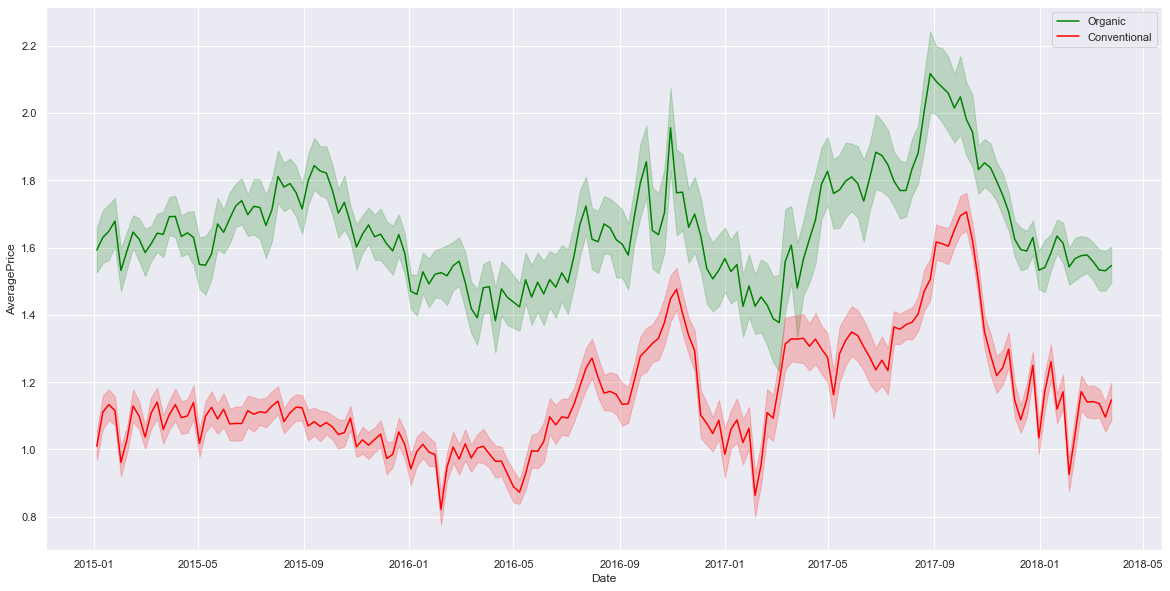

In [7]:
ax = sns.lineplot(x=org.index, y=org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.lineplot(x=conv.index, y=conv.AveragePrice, label=CONV_NAME, color='red')

## Relationship between Price and Volume

Let's analyze the relationship between price and volume: I expect the price being in inverse relationship with volume, because high produced volume brings to lower prices (offer-demand basic law).

### Organic

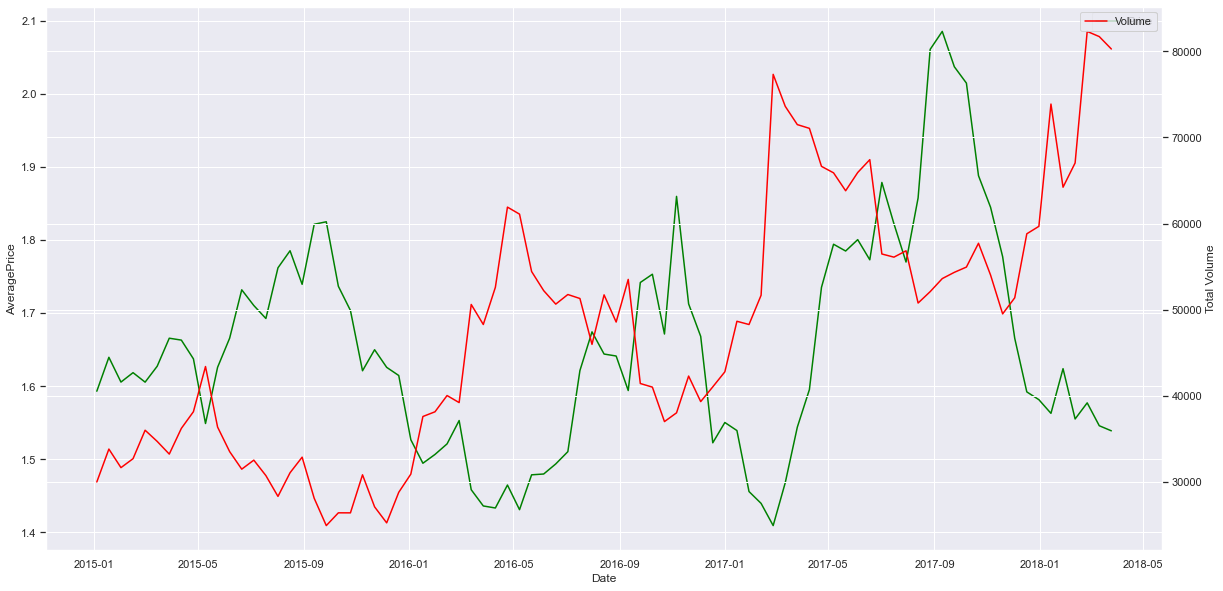

In [8]:
org_res = org.resample('2w').mean()
ax = sns.lineplot(x=org_res.index, y=org_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=org_res.index, y=org_res['Total Volume'], label='Volume', color='red', ax=ax2)

## Conventional

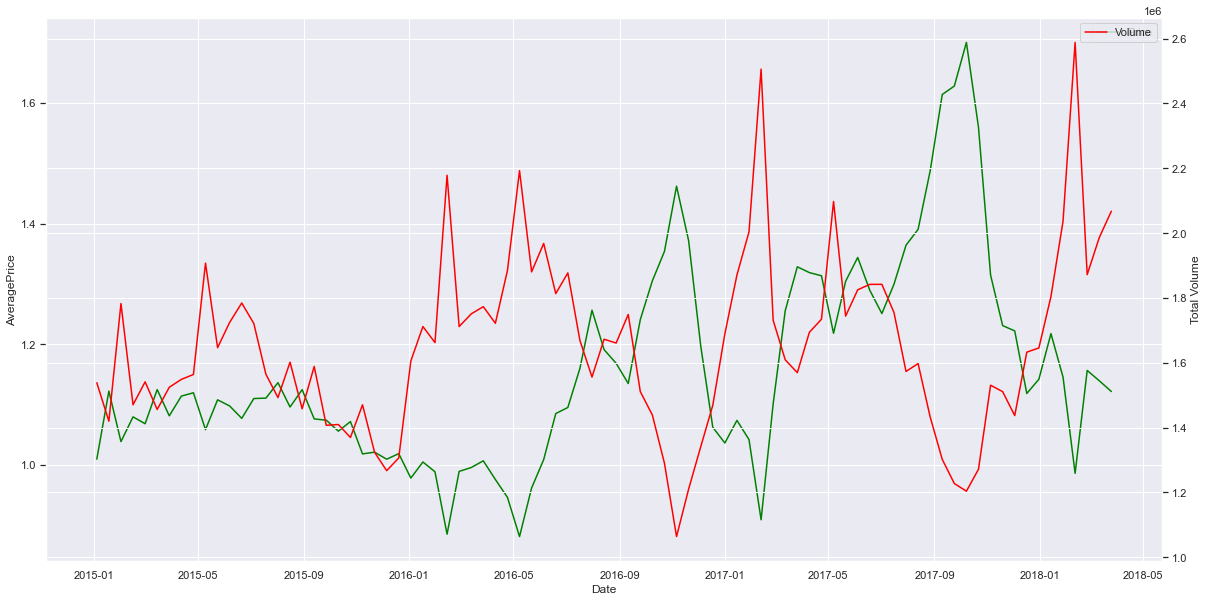

In [9]:
conv_res = conv.resample('2w').mean()
ax = sns.lineplot(x=conv_res.index, y=conv_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=conv_res.index, y=conv_res['Total Volume'], label='Volume', color='red', ax=ax2)

We can observe how the price is inversely related to the volume produces. Let's see the correlation value between Volume and Price:

In [10]:
print('Correlation for Organic', org_res['Total Volume'].corr(org_res['AveragePrice']))
print('Correlation for Conventional', conv_res['Total Volume'].corr(conv_res['AveragePrice']))

Correlation for Organic -0.12157112805891053
Correlation for Conventional -0.4878667309918981


## Seasonality

We'll now study the seasonality (i.e. significant repeated patterns over a year, a mont, or weather seasons).

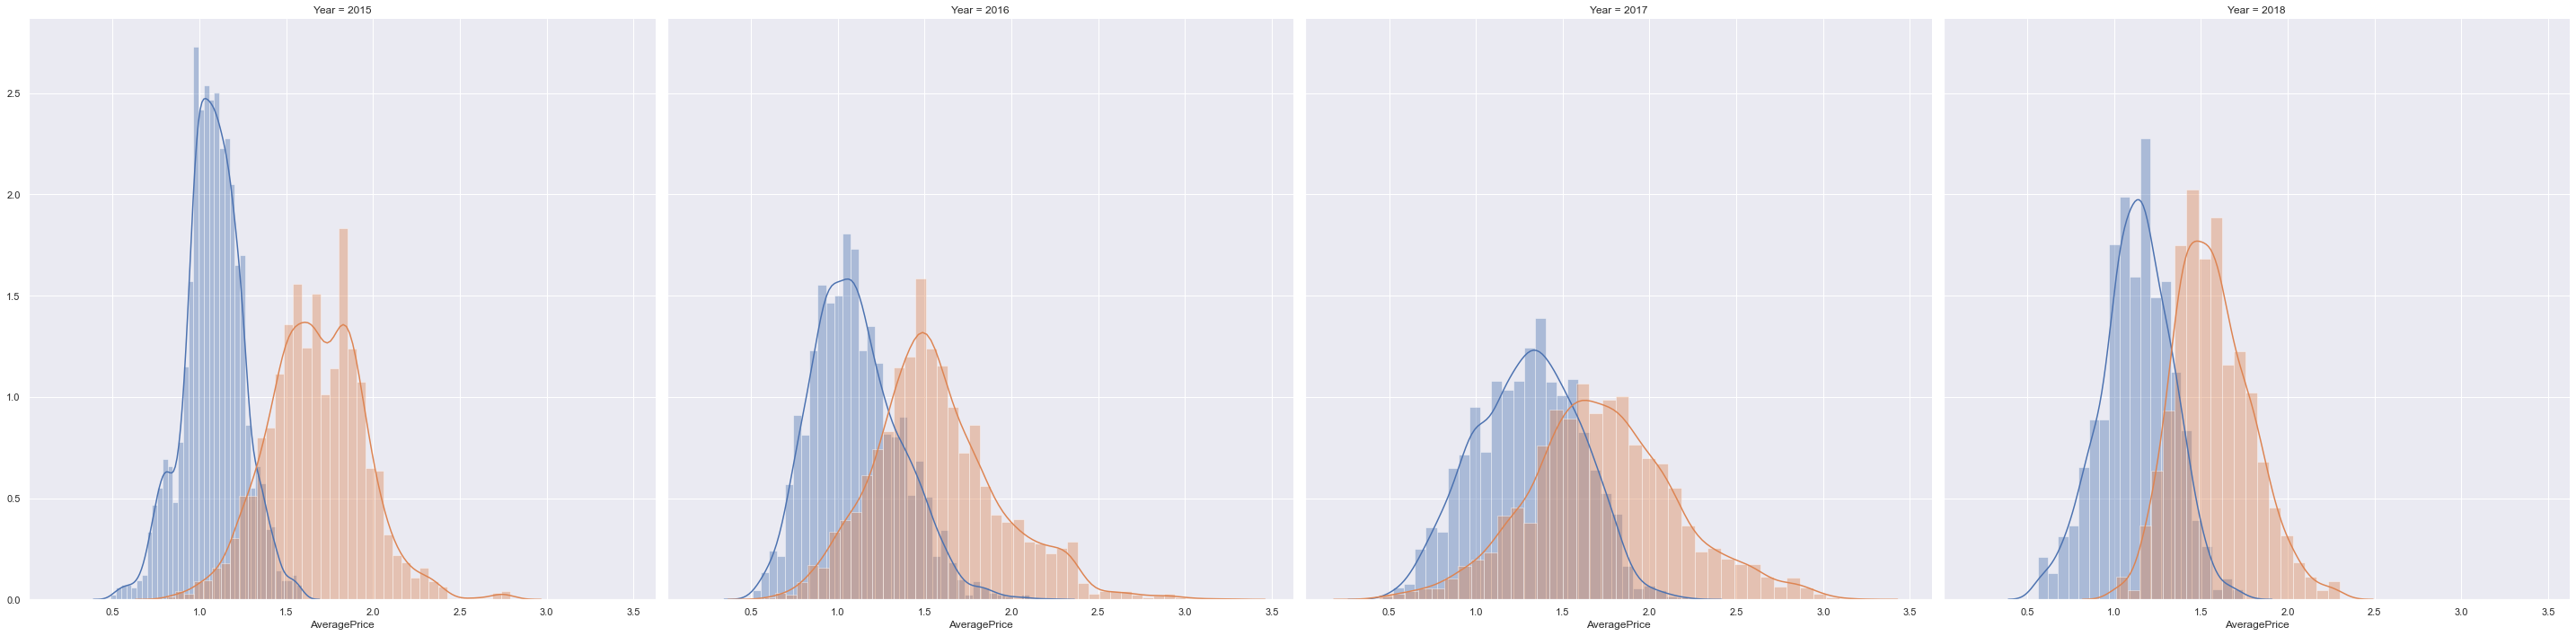

In [11]:
data['Year'] = data.index.year
data['Month'] = data.index.month.astype(str)
data['Day'] = data.index.day
data['Season'] = data.Month.apply(lambda x: season_dict[x])

g = sns.FacetGrid(data, col='Year', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")

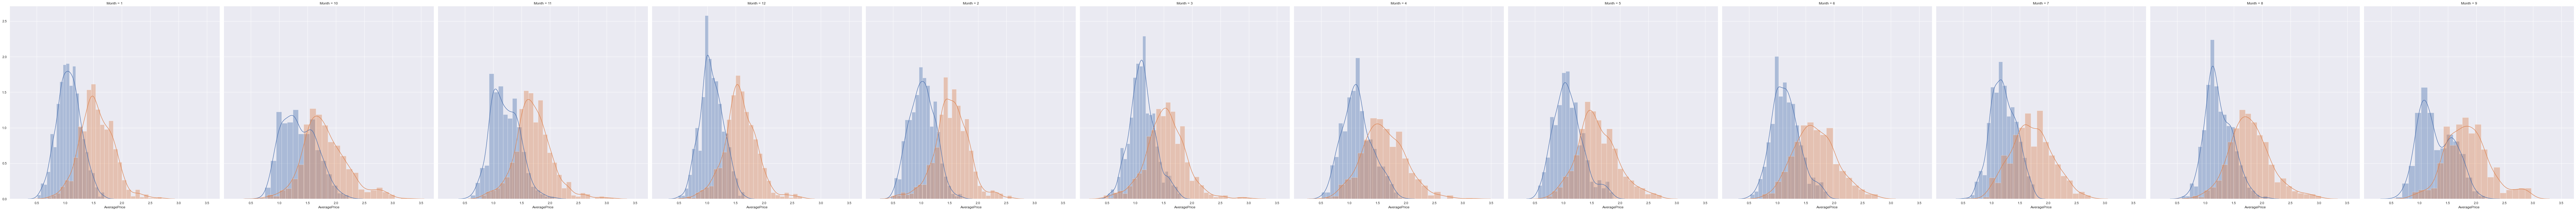

In [12]:
g = sns.FacetGrid(data, col='Month', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")


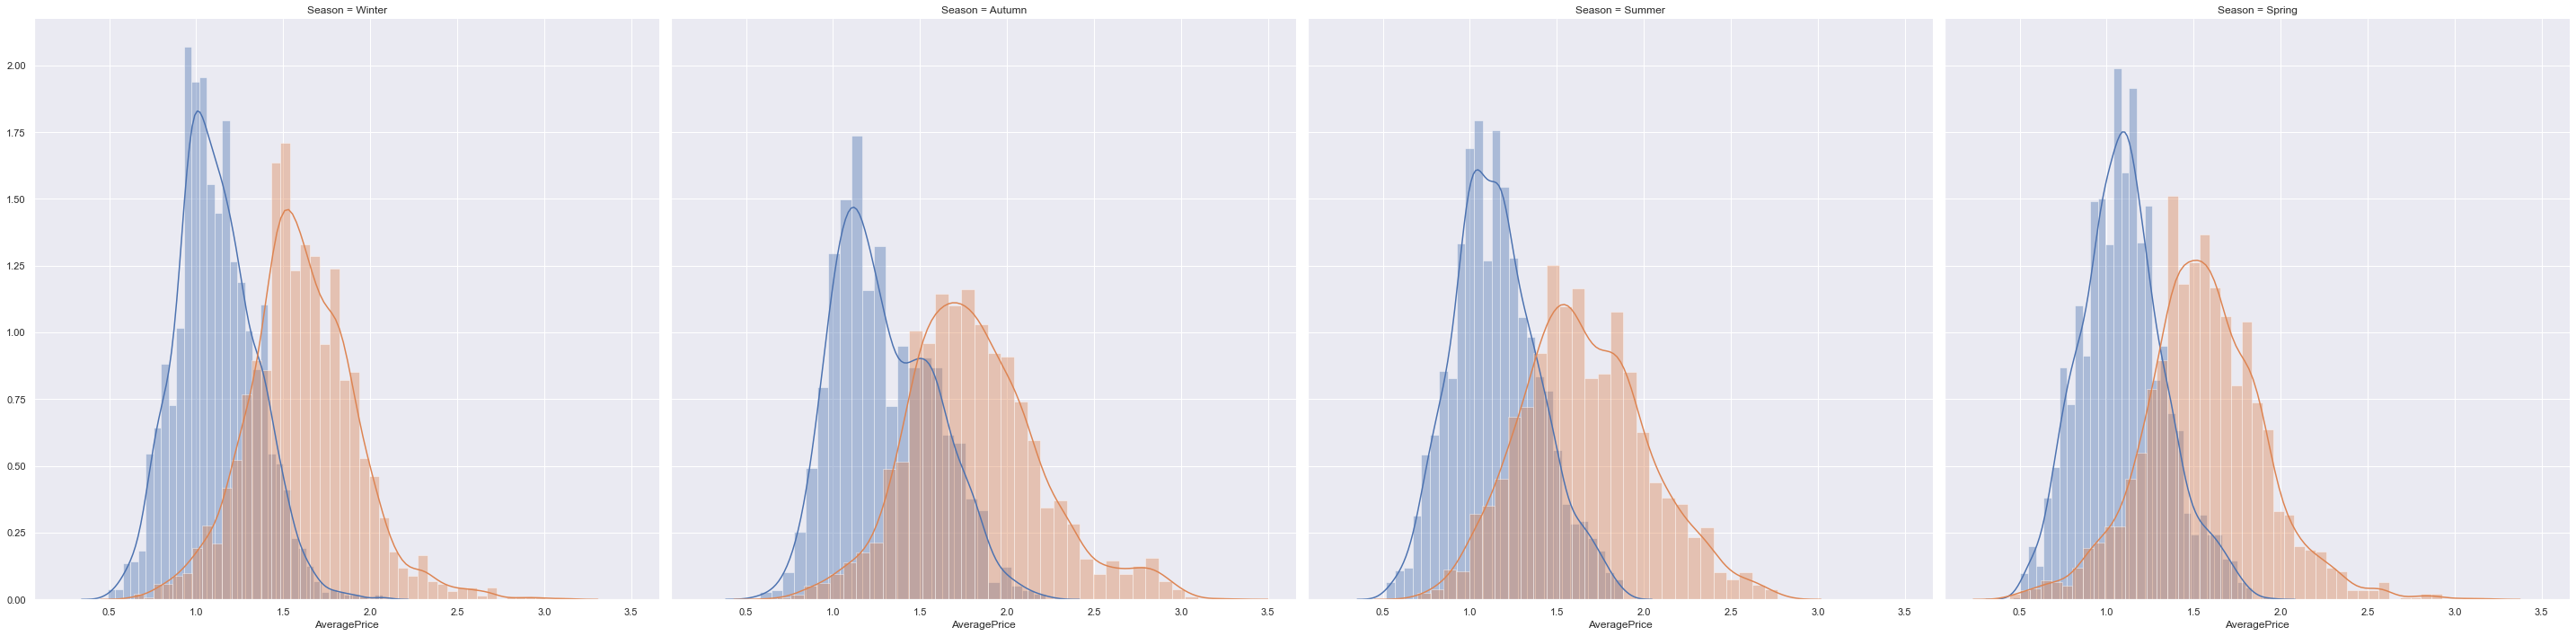

In [13]:
g = sns.FacetGrid(data, col='Season', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")

## What does it happen to the price in the different months of the year?

(1.0195092592592583, 1.5796825396825367)

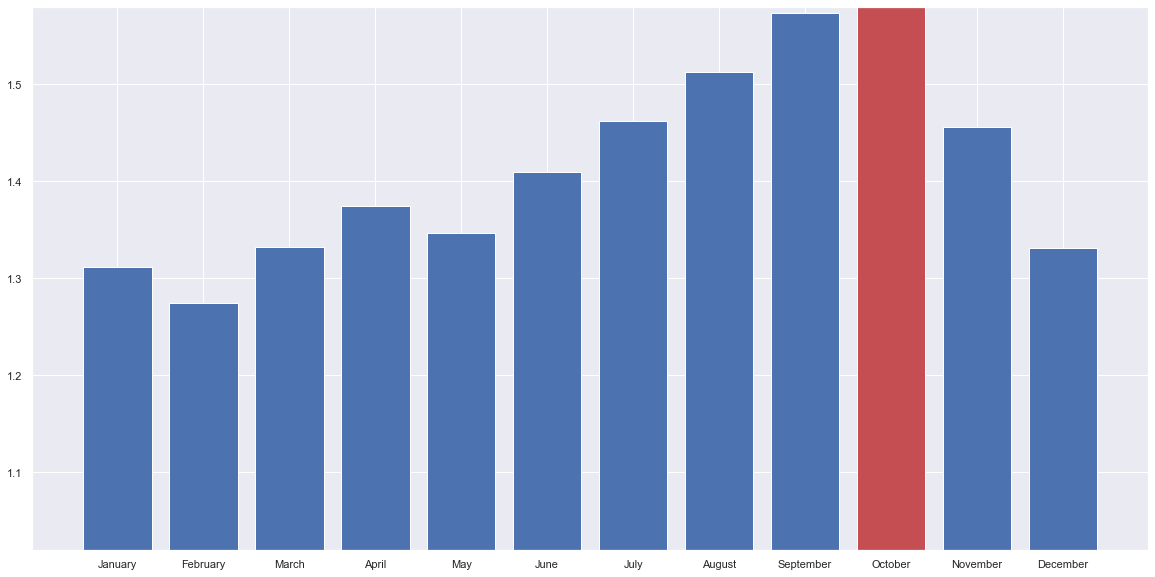

In [14]:
grouped = data.groupby(['Month']).mean()
grouped.index = grouped.index.astype(int)
grouped.sort_index(ascending=True)
grouped['MonthNum'] = grouped.index
grouped['MonthName'] = grouped.MonthNum.apply(lambda x: calendar.month_name[x])
grouped.sort_index(ascending=True, inplace=True)
max_bar = max(grouped.AveragePrice)
max_bar = grouped.MonthNum[grouped['AveragePrice'] == max_bar].tolist()[0]-1
ax = plt.bar(x=grouped.MonthName, height=grouped.AveragePrice)
ax[max_bar].set_fc('r')
plt.ylim([min(grouped.AveragePrice)-0.2*min(grouped.AveragePrice), max(grouped.AveragePrice)])


## And what about the price over the months and the years? 

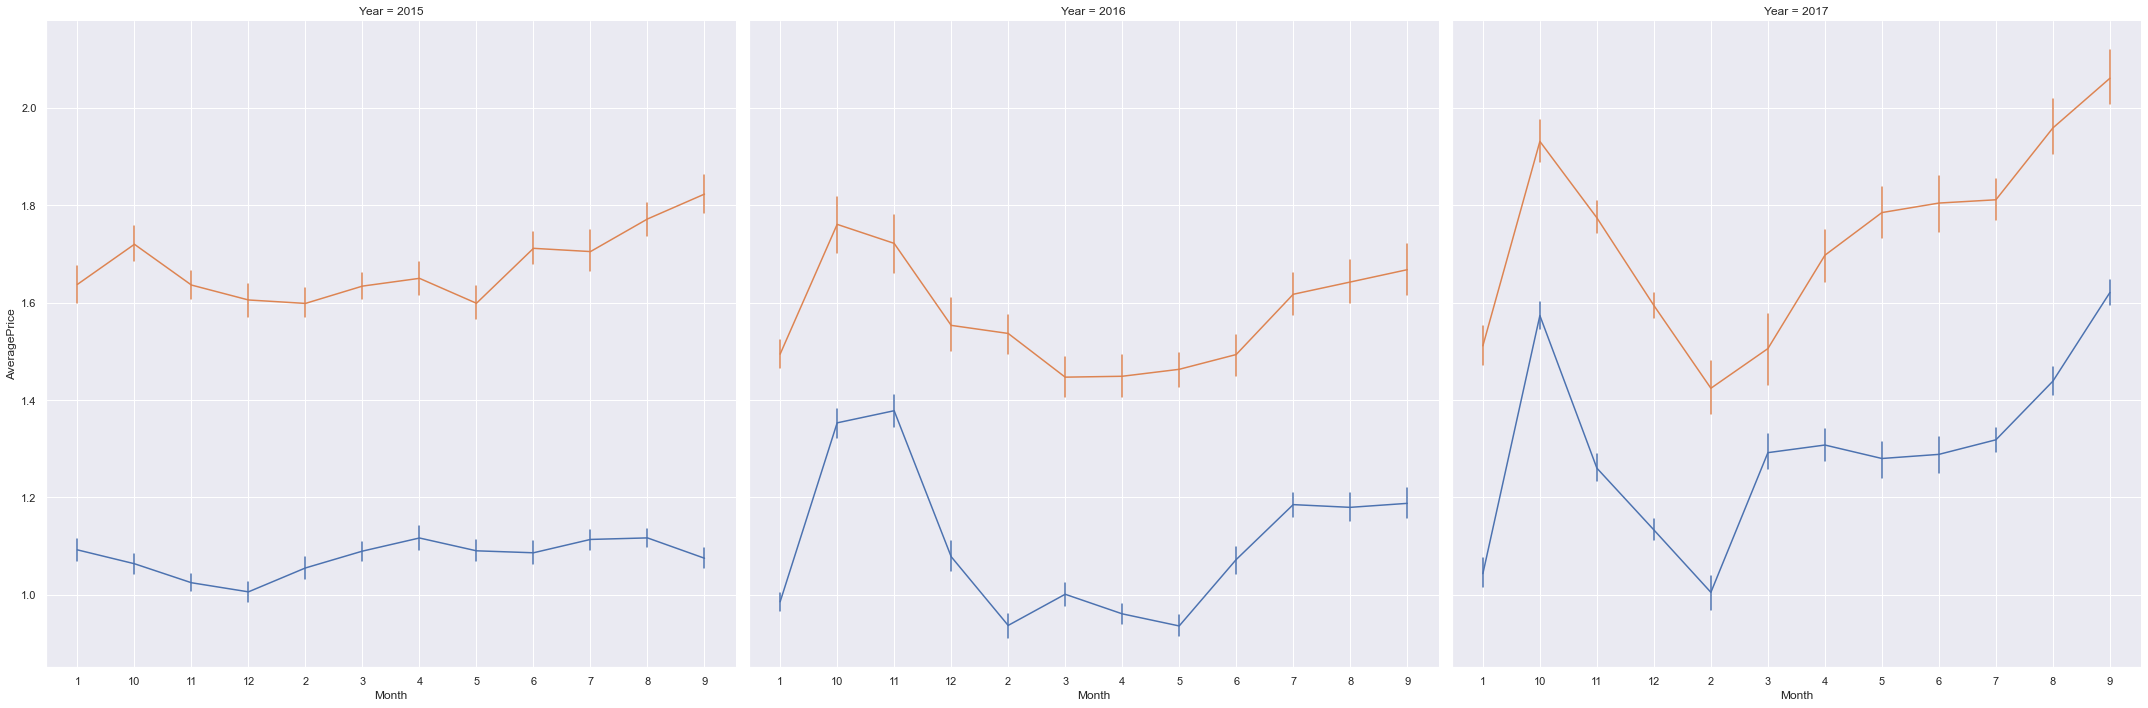

In [15]:
g = sns.FacetGrid(data.query("year != 2018"), col='Year', size=10, hue='type', legend_out=True, )
g.map(sns.lineplot, "Month", "AveragePrice", markers=True, err_style="bars")


## Let's see now what is the volatility of the prices during the 3 years, both for organic and conventional type.

In [16]:
grouped_std = data.groupby(['Month', 'year', 'type']).agg(np.std, ddof=0)
grouped_std['key'] = grouped_std.index
grouped_std['Year'] = grouped_std.key.apply(lambda x: x[1])
grouped_std['Month'] = grouped_std.key.apply(lambda x: x[0])
grouped_std['Type'] = grouped_std.key.apply(lambda x: x[2])

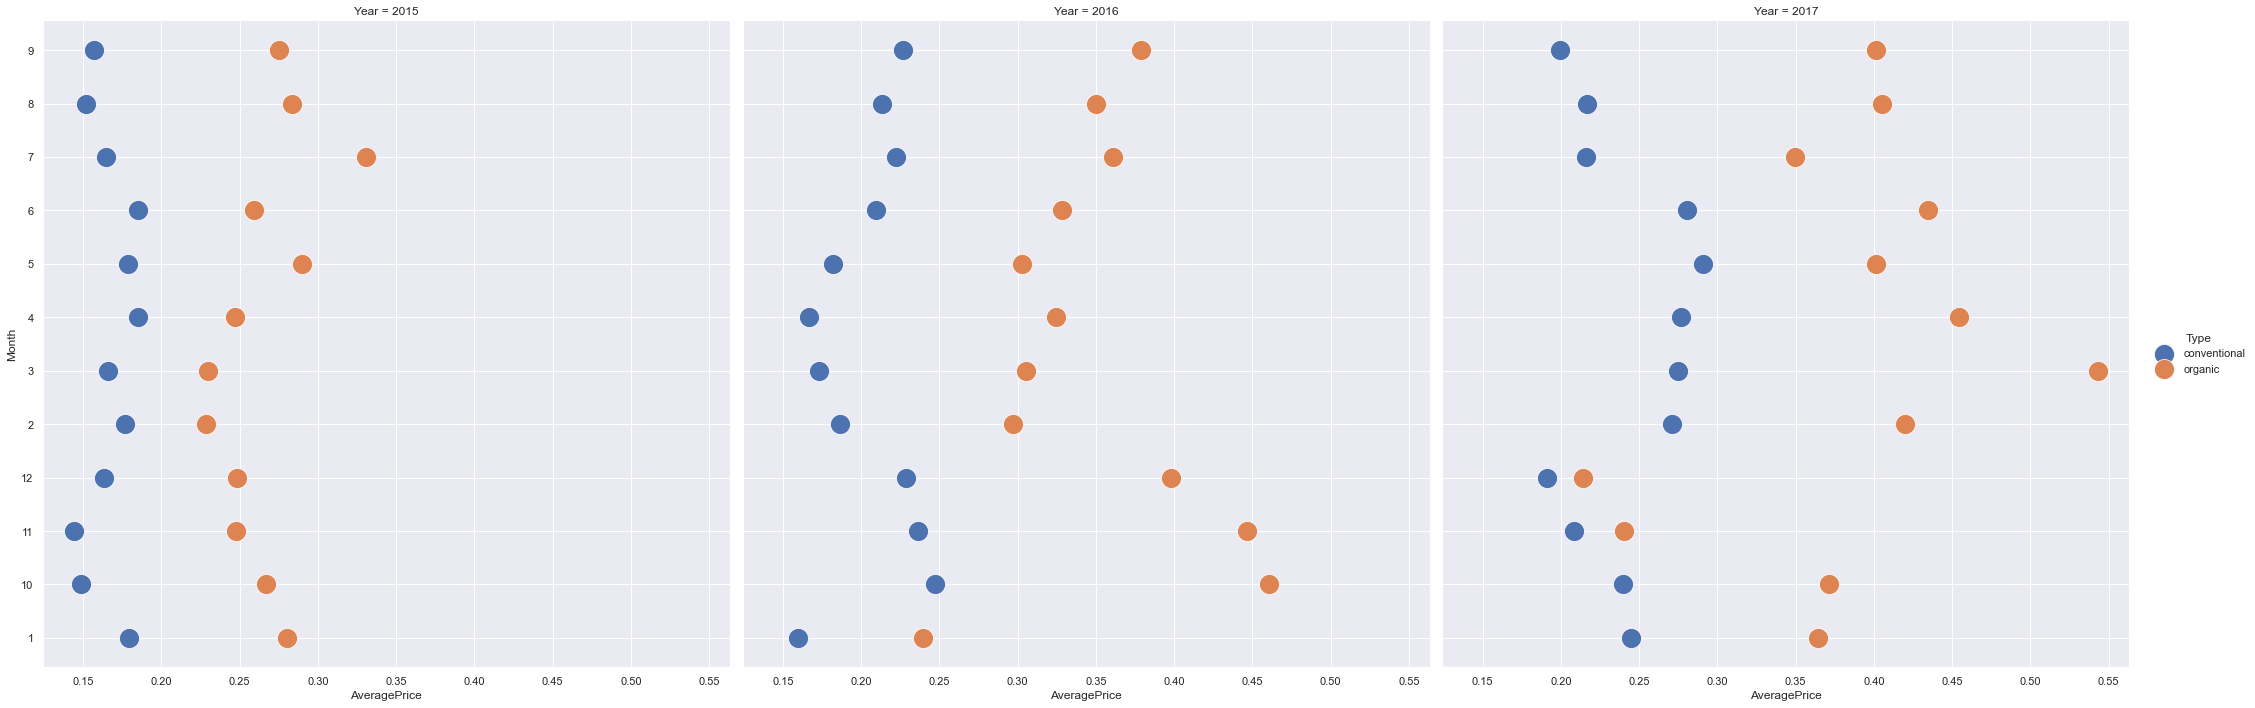

In [17]:
g = sns.FacetGrid(grouped_std.query("Year != 2018"), col='Year', size=10, hue='Type')
g.map(sns.scatterplot, "AveragePrice", "Month", s=400)
g.add_legend()


In [18]:
grouped_std

Unnamed: 0  AveragePrice  Total Volume          4046  \
Month year type                                                                 
1     2015 conventional    1.118034      0.179315  4.084273e+06  1.709414e+06   
           organic         1.126133      0.280529  9.133829e+04  3.661841e+04   
      2016 conventional    1.414214      0.159331  4.861575e+06  1.471599e+06   
           organic         1.414214      0.239736  1.058274e+05  1.601327e+04   
      2017 conventional    1.414214      0.244799  5.449255e+06  1.874263e+06   
...                             ...           ...           ...           ...   
9     2015 organic         1.126133      0.275062  7.546216e+04  1.833720e+04   
      2016 conventional    1.118034      0.226682  4.612380e+06  1.761520e+06   
           organic         1.118034      0.378574  1.336963e+05  1.937375e+04   
      2017 conventional    1.118034      0.199213  3.559057e+06  1.310973e+06   
           organic         1.118034      0.401271  1.511215e+05  1.796121e+04   

                                 4225           4770    Total Bags  \
Month year type                                                      
1     2015 conventional  1.685238e+06  120383.780056  6.358926e+05   
           organic       3.704320e+04     737.843705  1.987062e+04   
      2016 conventional  1.966098e+06  211992.550400  1.313334e+06   
           organic       3.824356e+04    1601.657797  5.221433e+04   
      2017 conventional  1.856817e+06  101934.544686  1.707779e+06   
...                               ...            ...           ...   
9     2015 organic       3.559150e+04     845.695898  2.246760e+04   
      2016 conventional  1.399788e+06   73595.555506  1.430255e+06   
           organic       4.332028e+04     683.110540  7.281557e+04   
      2017 conventional  1.170887e+06   71066.798041  1.060035e+06   
           organic       3.473509e+04     222.860824  1.009481e+05   

                           Small Bags     Large Bags   XLarge Bags  Year  \
Month year type                                                            
1     2015 conventional  5.254356e+05  113226.113352   2371.879659  2015   
           organic       1.462316e+04    6420.944567      0.000000  2015   
      2016 conventional  9.687844e+05  357312.176123  22457.053388  2016   
           organic       2.549847e+04   28339.604799      0.000000  2016   
      2017 conventional  1.311877e+06  408647.795883  12598.140156  2017   
...                               ...            ...           ...   ...   
9     2015 organic       1.446611e+04   10079.918595      0.000000  2015   
      2016 conventional  1.108789e+06  333567.501642  12588.855512  2016   
           organic       5.384650e+04   21049.213188      0.000000  2016   
      2017 conventional  7.867984e+05  263750.856103  21728.735534  2017   
           organic       8.526261e+04   17201.551061     21.929993  2017   

                              Day                      key Month          Type  
Month year type                                                                 
1     2015 conventional  7.826238  (1, 2015, conventional)     1  conventional  
           organic       7.826238       (1, 2015, organic)     1       organic  
      2016 conventional  9.899495  (1, 2016, conventional)     1  conventional  
           organic       9.899495       (1, 2016, organic)     1       organic  
      2017 conventional  9.899495  (1, 2017, conventional)     1  conventional  
...                           ...                      ...   ...           ...  
9     2015 organic       7.826238       (9, 2015, organic)     9       organic  
      2016 conventional  7.826238  (9, 2016, conventional)     9  conventional  
           organic       7.826238       (9, 2016, organic)     9       organic  
      2017 conventional  7.826238  (9, 2017, conventional)     9  conventional  
           organic       7.826238       (9, 2017, organic)     9       organic  

[78 rows x 15 col

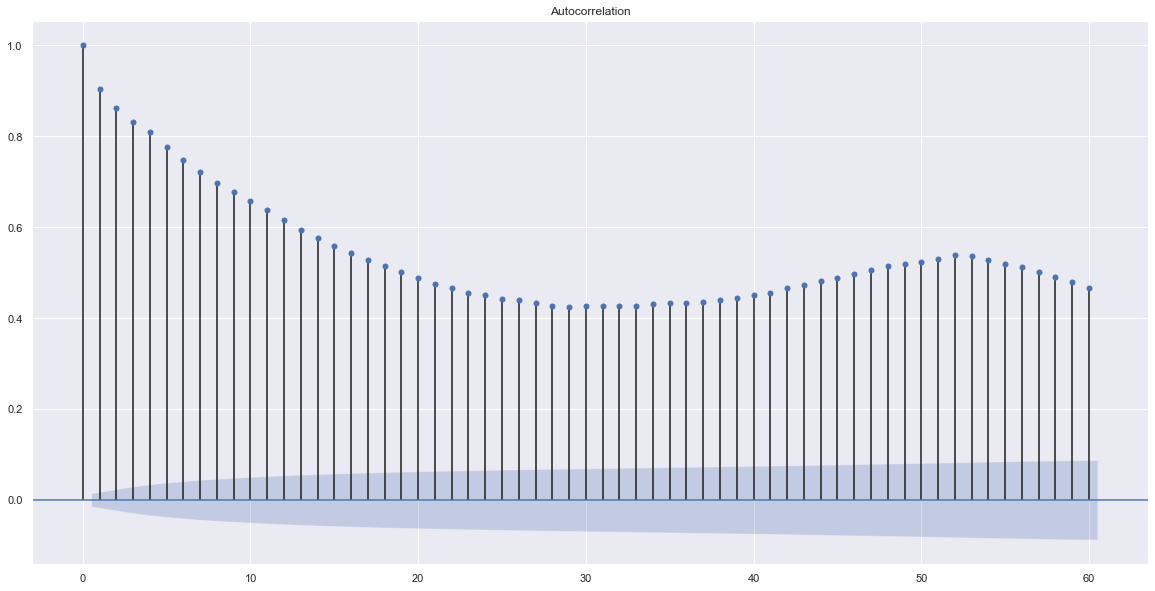

In [14]:
# Display the autocorrelation plot 
fig = tsaplots.plot_acf(data['AveragePrice'], lags=60)
plt.show()